In [2]:
import scrapy
from scrapy.http import TextResponse
from selenium import webdriver

In [66]:
# 링크
url = "https://news.daum.net/breakingnews/economic"
driver = webdriver.Chrome(r'C:\Users\Gk\Documents\dev\etc\chromedriver.exe')
driver.get(url)

In [68]:
elements = driver.find_elements_by_xpath('//*[@id="mArticle"]/div[3]/ul/li/div/strong/a')
links = [element.get_attribute("href") for element in elements]
links

['https://v.daum.net/v/20200707004955098',
 'https://v.daum.net/v/20200707004639085',
 'https://v.daum.net/v/20200707003806067',
 'https://v.daum.net/v/20200707003153032',
 'https://v.daum.net/v/20200707003037028',
 'https://v.daum.net/v/20200707002814007',
 'https://v.daum.net/v/20200707002008958',
 'https://v.daum.net/v/20200707002008957',
 'https://v.daum.net/v/20200707001813944',
 'https://v.daum.net/v/20200707001706936',
 'https://v.daum.net/v/20200707001102884',
 'https://v.daum.net/v/20200707000607839',
 'https://v.daum.net/v/20200707000553832',
 'https://v.daum.net/v/20200707000550831',
 'https://v.daum.net/v/20200707000547830']

In [17]:
# 상세페이지 : sc
url = links[3]
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 https://news.v.daum.net/v/20200706224848250>

In [18]:
title = response.xpath('//*[@id="cSub"]/div/h3')[0].extract().split(">")[1].split("<")[0]
category = response.xpath('//*[@id="kakaoBody"]')[0].extract().split(">")[1].split("<")[0]
content = response.xpath('//*[@id="harmonyContainer"]/section/p/text()').extract()
content = "".join(content).replace("\xa0", " ")

title, category, content

('한돈자조금관리위원회, 한돈·아가볼 어린이 서포터즈 8명 선정',
 '경제',
 " 한돈자조금관리위원회가 가족 예능 프로그램 TV아가볼과 함께 진행한 '아가볼·한돈 서포터즈&광고모델 오디션'에서 8인의 최종 우승 어린이를 선정하고 시상식을 했습니다.지난 3일 경기도 이천 도드람테마파크에서 진행된 아가볼·한돈 서포터즈 선발 오디션 시상식에 참여한 8명의 어린이에게 '아가볼 한돈 서포터즈 인증서'가 전달됐습니다.행사에 참석한 정상은 한돈자조금관리위원회 사무국장은 아이들에게 인증서와 도드람 한돈 선물세트를 수여했습니다.시상식을 마친 국예영 외 7명의 어린이는 한돈 바이럴 광고영상 촬영에 돌입했는데, 이번달 말에 송출될 한돈 유튜브 바이럴 광고 영상에는 키즈카페에서 신나게 노는 아이들의 모습과 직접 장을 보며 한돈을 고르는 장면이 담길 예정입니다.[ 이상범 기자 / boomsang@daum.net ]")

# Scrapy 작성

In [19]:
!scrapy startproject newsDaum

New Scrapy project 'newsDaum', using template directory 'c:\users\gk\anaconda3\lib\site-packages\scrapy\templates\project', created in:
    C:\Users\Gk\Documents\dev\Crawling\DaumNews\newsDaum

You can start your first spider with:
    cd newsDaum
    scrapy genspider example example.com


In [21]:
%%writefile newsDaum/newsDaum/items.py

import scrapy

class NewsdaumItem(scrapy.Item):
    title = scrapy.Field()
    content = scrapy.Field()
    category = scrapy.Field()
    link = scrapy.Field()

Overwriting newsDaum/newsDaum/items.py


In [15]:
%%writefile newsDaum/newsDaum/spiders/spider.py
import scrapy
from newsDaum.items import NewsdaumItem
# from selenium import webdriver
from scrapy.http import TextResponse
import requests

class DaumSpider(scrapy.Spider):
    name = "NewsDaum"
    allow_domain = ["https://daum.net"]
    start_urls = ["https://news.daum.net/breakingnews/economic"]
    
    def parse(self, response):
        categories = ['society', 'politics', 'economic', 'foreign', 'culture', 'entertain', 'sports', 'digital']
        for name in categories:
            for page in range(1, 11):
                url = "https://news.daum.net/breakingnews/{}?page={}".format(name, page)
                req = requests.get(url)
                response = TextResponse(req.url, body=req.text, encoding="utf-8")
                links  = response.xpath('//*[@id="mArticle"]/div[3]/ul/li/div/strong/a/@href').extract()
                for link in links:
                    yield scrapy.Request(link, callback=self.parse_content)
            
    def parse_content(self, response):
        item = NewsdaumItem()
        item['title'] = response.xpath('//*[@id="cSub"]/div/h3')[0].extract().split(">")[1].split("<")[0]
        item['category'] = response.xpath('//*[@id="kakaoBody"]')[0].extract().split(">")[1].split("<")[0]
        content = response.xpath('//*[@id="harmonyContainer"]/section/p/text()').extract()
        item['content'] = "".join(content)
        item['link'] = response.url
        yield item

Overwriting newsDaum/newsDaum/spiders/spider.py


In [9]:
name, page = 'society', '1'
url = "https://news.daum.net/breakingnews/{}?page={}".format(name, page)
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
links  = response.xpath('//*[@id="mArticle"]/div[3]/ul/li/div/strong/a/@href').extract()
links

['https://v.daum.net/v/20200712170229555',
 'https://v.daum.net/v/20200712170219554',
 'https://v.daum.net/v/20200712170213553',
 'https://v.daum.net/v/20200712170207548',
 'https://v.daum.net/v/20200712170206547',
 'https://v.daum.net/v/20200712170203546',
 'https://v.daum.net/v/20200712170201544',
 'https://v.daum.net/v/20200712170150538',
 'https://v.daum.net/v/20200712170147536',
 'https://v.daum.net/v/20200712170139535',
 'https://v.daum.net/v/20200712170136534',
 'https://v.daum.net/v/20200712170129532',
 'https://v.daum.net/v/20200712170129531',
 'https://v.daum.net/v/20200712170123526',
 'https://v.daum.net/v/20200712170122525']

In [24]:
!sed -i 's/ROBOTSTXT_OBEY = True/ROBOTSTXT_OBEY = False/' newsDaum/newsDaum/settings.py

In [25]:
%%writefile run.sh
cd newsDaum
scrapy crawl NewsDaum -o daum_article.csv

Writing run.sh


In [1]:
!run.sh

In [2]:
df = pd.read_csv('newsDaum/daum_article.csv')

In [3]:
df_a = df['content']
df_a

0       고양시는 이에 대해 국토교통부에 확인해본 결과 관련 내용은 고양과 전혀 관련 없는 ...
1        대한철인3종협회는 6일 서울올림픽파크텔에서 스포츠공정위원회를 열고 고 최숙현 선수...
2       [경향신문] 대한철인3종협회 스포츠 공정위원회의 마라톤 심의는 6시간이 넘도록 계속...
3       [앵커] 고 최숙현 선수에게 가혹 행위를 한 혐의를 받는 김규봉 경주시청 감독과 여...
4       [앵커]이른바 검언 유착 의혹 수사와 관련해 추미애 법무부 장관이 내린 수사지휘에 ...
                              ...                        
2184                          이영훈 (rok6658@edaily.co.kr) 
2185    (경남=뉴스1) 최대윤 기자 = 경남 통영시는 통영시립산양도서관을 어린이미각도서관으...
2186    10일 강 변호사와 김 전 기자가 운영 중인 보수성향 유튜브 채널 ‘가로세로연구소(...
2187                          이영훈 (rok6658@edaily.co.kr) 
2188                          이영훈 (rok6658@edaily.co.kr) 
Name: content, Length: 2189, dtype: object

In [4]:
from konlpy.tag import Okt
from tqdm import tqdm
from nltk import FreqDist
from wordcloud import WordCloud
from datetime import datetime

def tokenize(doc):
    tagger = Okt()
    tokens = [t for t in tagger.nouns(doc)]
    return tokens

def towordcloud(df):
    df = df.dropna()
    docs = tuple([x for x in df.to_numpy()])
    sentences = []
    for d in tqdm(docs):
        tokens = [token for token in tokenize(d) if token.isalnum()]
        sentences.append(tokens)
    words = [word for sentence in sentences for word in sentence]
    words = [word for word in words if len(word) > 1]
    words_remove = ['으로', '에서', '에도', '했다', '있다', '이다', '무단', '배포', '위해', '대표', '때문', 
                    '그룹', '통해', '최근', '경우', '이번', '이후', '라며', '지난', '대해', '기자', '관련',
                   ]
    words_r = [word for word in words if word not in words_remove]
    fd = FreqDist(words_r)
#     print(fd.most_common(20))
    font_path = r'C:\Users\Gk\Documents\dev\Crawling\koverwatch.ttf'
    wc = WordCloud(width=1000, height=600, background_color="white", random_state=0,
                  font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(fd))
    plt.axis("off")
    str = "wordcloud_" + datetime.now().strftime("%d.%m.%Y_%H.%M.%S") + ".png"
    plt.savefig(str)
    plt.show()

100%|██████████| 2145/2145 [02:07<00:00, 16.77it/s]


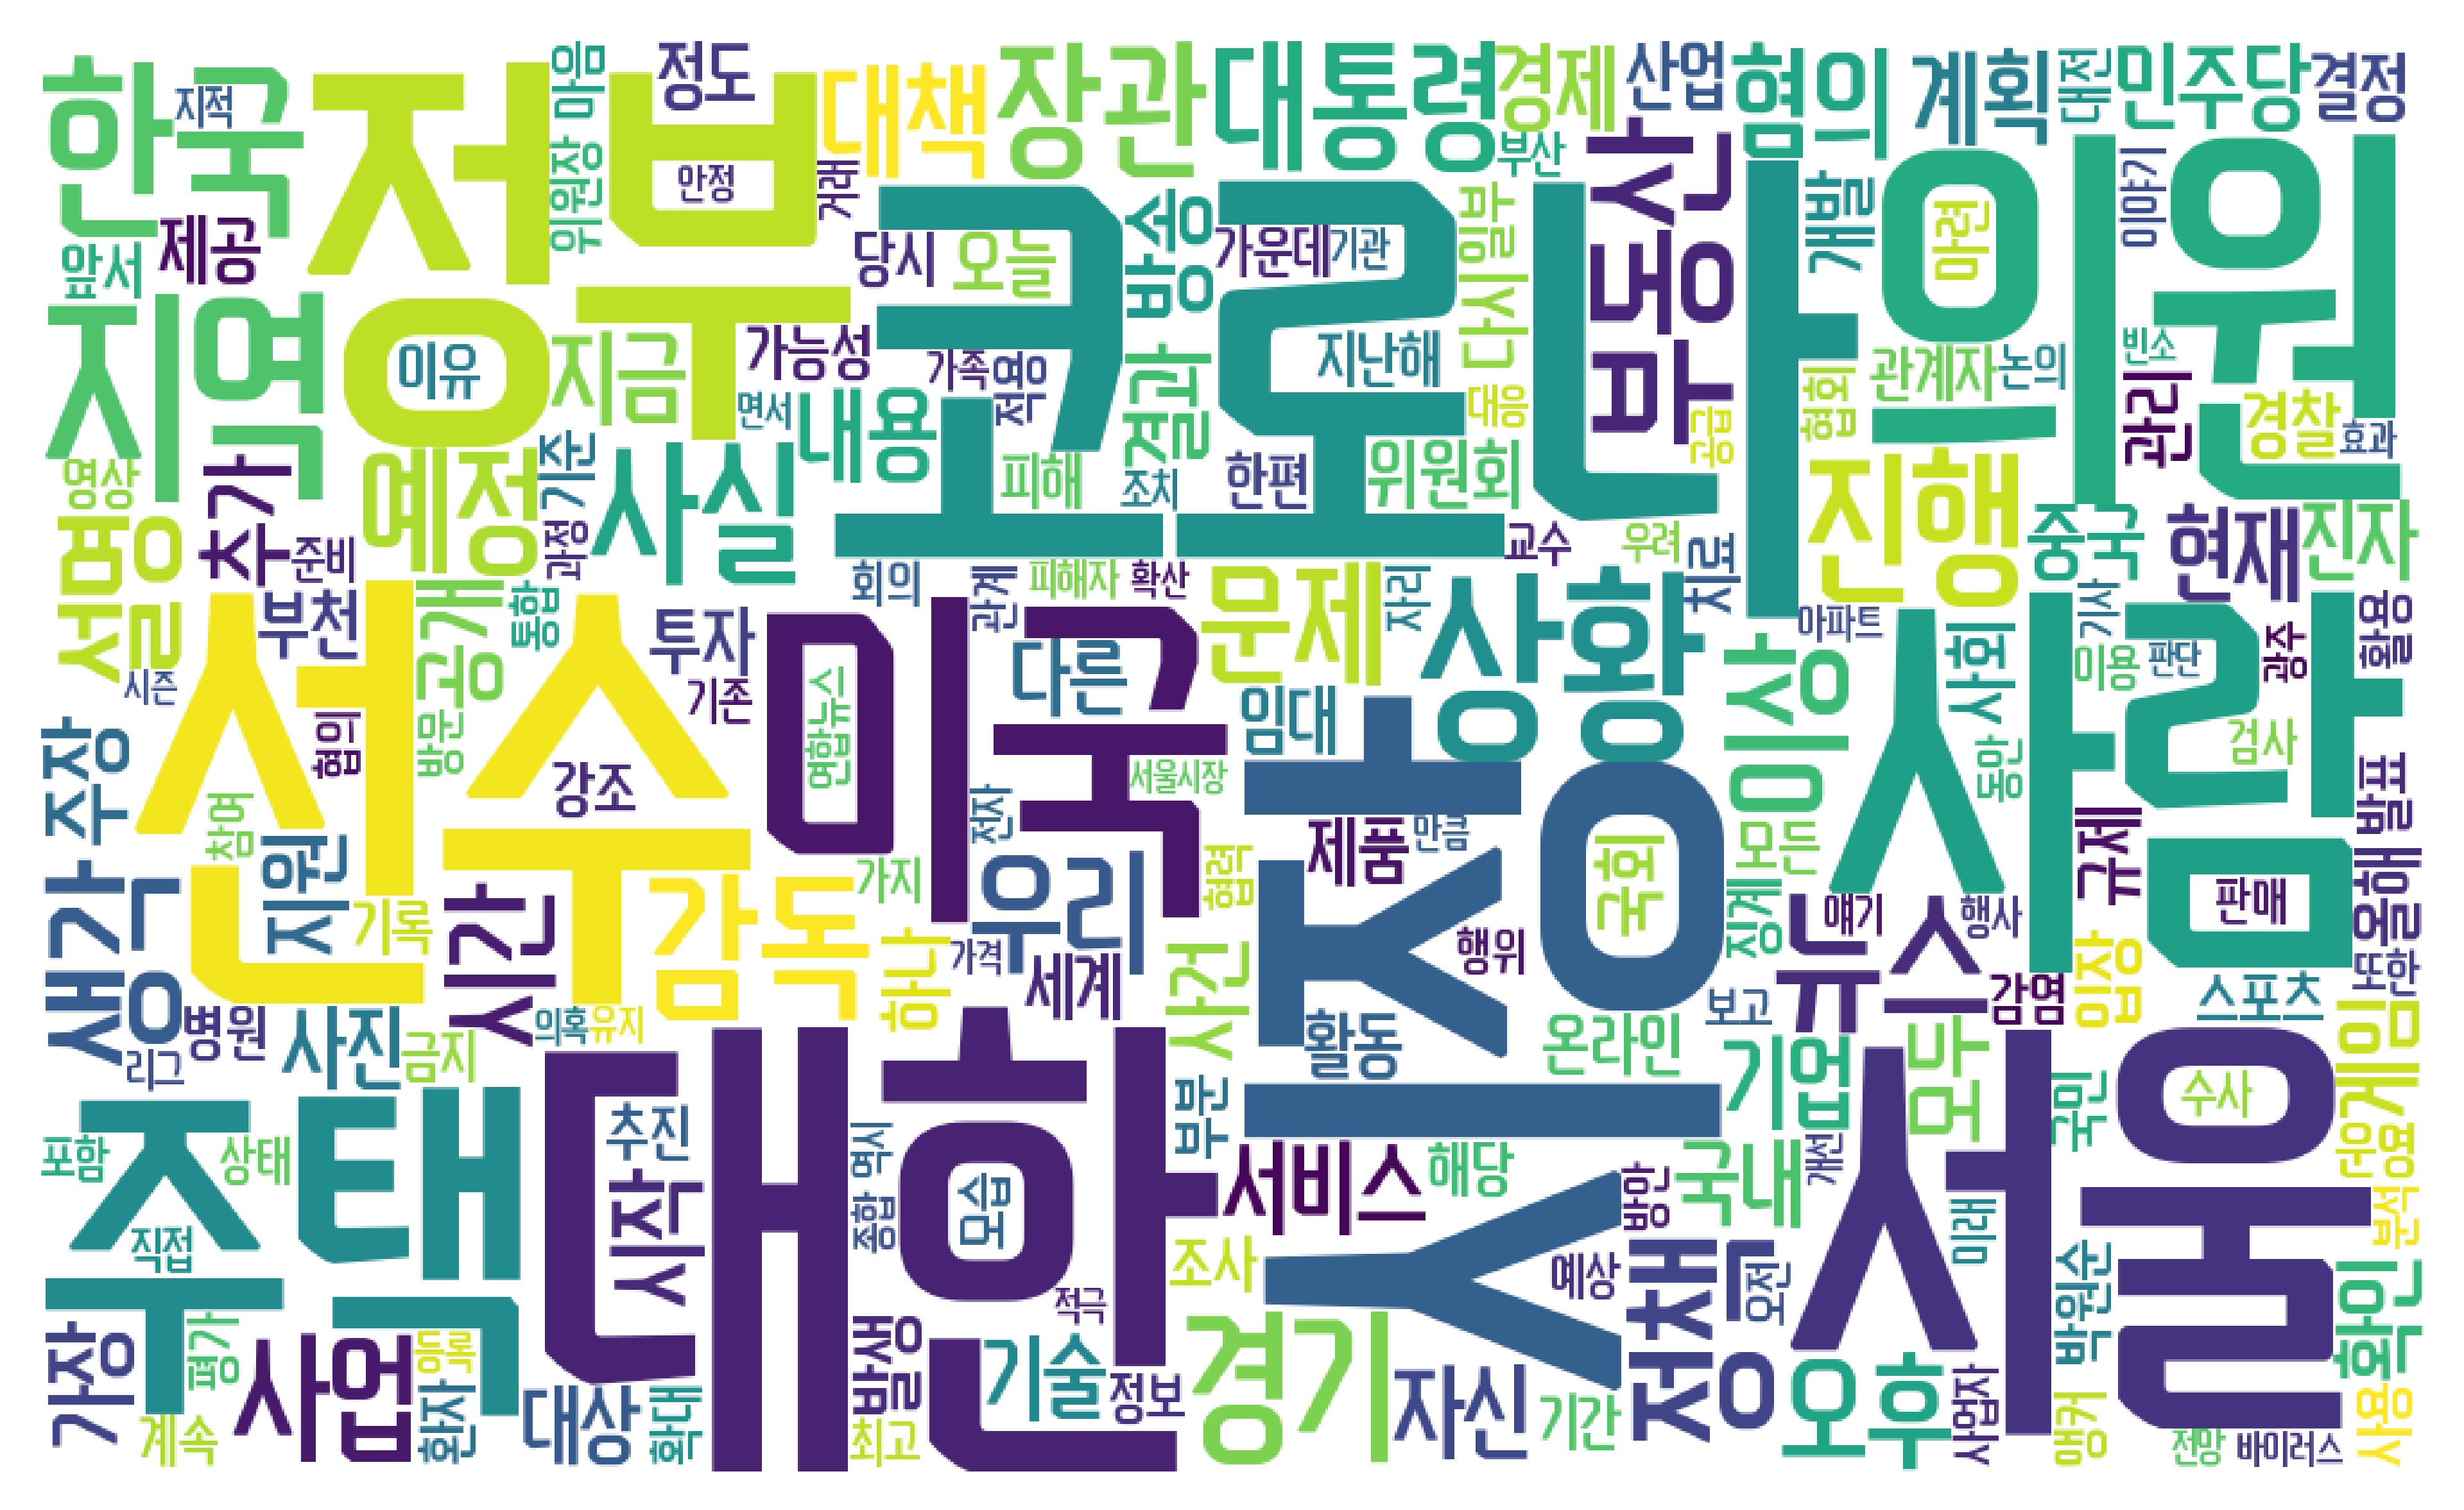

In [5]:
towordcloud(df['content'])

# Pipeline settings

In [11]:
import pymongo
client = pymongo.MongoClient("mongodb://")
db = client.daum
collection = db.article

collection.insert({"title": "data1"})

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5f0ac42702b0762a97744658')

In [1]:
%%writefile newsDaum/newsDaum/mongodb.py
import pymongo

client = pymongo.MongoClient("mongodb://")
db = client.daum
collection = db.article

Overwriting newsDaum/newsDaum/mongodb.py


In [18]:
%%writefile newsDaum/newsDaum/pipelines.py
from itemadapter import ItemAdapter
from .mongodb import collection

class NewsdaumPipeline:
    
    def process_item(self, item, spider):
        
        data = {
            "title": item["title"],
            "category": item["category"],
            "content": item["content"],
            "link": item["link"],
        }
        collection.insert(data)
        
        return item


Overwriting newsDaum/newsDaum/pipelines.py


In [ ]:
result = client['daum'].article
df = pd.DataFrame(list(result.find()))
df